In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('./Bike-Sharing-Dataset/day.csv', sep=',')

In [3]:
# rescaling normalized features to get a feel for real values. Also normalization can be later performed by Standard Scalar

In [4]:
df['temp_org'] = df['temp']*(39-(-8)) + (-8)
df['atemp_org'] = df['atemp']*(50-(-16)) + (-16)
df['windspeed_org'] = df['windspeed']*100
df['hum_org'] = df['hum']*67


In [5]:
# Scale the numerical features using Standard Scaler

In [6]:
data_num = df[['atemp_org', 'temp_org', 'hum_org', 'windspeed_org']].copy()

In [7]:
X_num = StandardScaler().fit_transform(data_num)


In [8]:
df['atemp_norm'] = X_num[:,0]
df['temp_norm'] = X_num[:,1]
df['hum_norm'] = X_num[:,2]
df['windspeed_norm'] = X_num[:,3]

Discard temp, as it is highly correlated with atemp and mnth and weekday, as these have a lot of levels

In [9]:
#features = ['atemp_norm', 'temp_norm', 'hum_norm', 'windspeed_norm', 'season', 'mnth', 'holiday', 'weekday',
 #      'workingday', 'weathersit']
features = ['atemp_norm', 'hum_norm', 'windspeed_norm', 'holiday',
       'workingday']
categorical_columns = ['season','weathersit']


X = df[features]

In [10]:
from sklearn.preprocessing import OneHotEncoder



categorical_data = df[categorical_columns]

In [11]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = OneHotEncoder()

# 2. FIT
enc.fit(categorical_data)

# 3. Transform
onehotlabels = enc.transform(categorical_data).toarray()
onehotlabels.shape

cat_onehot_df = pd.DataFrame(onehotlabels, columns = ['season1', 'season2', 'season3', 'season4', 'weathersit1', 'weathersit2', 'weathersit3'])

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

In [12]:
cat_onehot_df.head()

,season1,season2,season3,season4,weathersit1,weathersit2,weathersit3
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
X = pd.concat([X,cat_onehot_df], axis = 1, join = 'inner')
X.head()

,atemp_norm,hum_norm,windspeed_norm,holiday,workingday,season1,season2,season3,season4,weathersit1,weathersit2,weathersit3
0,-0.679946,1.250171,-0.387892,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.740652,0.479113,0.749602,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.749767,-1.339274,0.746632,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.610270,-0.263182,-0.389829,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.504971,-1.341494,-0.046307,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,temp_org,atemp_org,windspeed_org,hum_org,atemp_norm,temp_norm,hum_norm,windspeed_norm
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,8.175849,7.999250,16.0446,53.990811,-0.679946,-0.826662,1.250171,-0.387892
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801,9.083466,7.346774,24.8539,46.637829,-0.740652,-0.721095,0.479113,0.749602
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,1.229108,-3.499270,24.8309,29.297291,-1.749767,-1.634657,-1.339274,0.746632
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1454,1562,1.400000,-1.999948,16.0296,39.559145,-1.610270,-1.614780,-0.263182,-0.389829
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1518,1600,2.666979,-0.868180,18.6900,29.276119,-1.504971,-1.467414,-1.341494,-0.046307


In [15]:
y = df['casual']

In [16]:
y.max()

3410

In [17]:
y.min()

2

In [18]:
y_all = df['cnt']

In [19]:
y_all.max()

8714

In [20]:
y_all.min()

22

In [21]:
y_reg = df['registered']

In [22]:
y_reg.max()

6946

In [23]:
y_reg.min()

20

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
X_train

,atemp_norm,hum_norm,windspeed_norm,holiday,workingday,season1,season2,season3,season4,weathersit1,weathersit2,weathersit3
688,-0.606283,-0.032045,0.575646,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
649,-0.265195,-1.156180,-0.114794,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
637,0.343519,-0.597036,0.479280,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
525,1.068550,-1.340609,-0.596543,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
367,-2.137425,-1.311332,2.262059,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.578834,-0.706119,1.034514,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
106,-0.175978,-1.042010,1.459229,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
270,0.619000,1.551700,-0.540478,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
435,-0.704232,-1.060460,0.414499,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   instant         731 non-null    int64  
 1   dteday          731 non-null    object 
 2   season          731 non-null    int64  
 3   yr              731 non-null    int64  
 4   mnth            731 non-null    int64  
 5   holiday         731 non-null    int64  
 6   weekday         731 non-null    int64  
 7   workingday      731 non-null    int64  
 8   weathersit      731 non-null    int64  
 9   temp            731 non-null    float64
 10  atemp           731 non-null    float64
 11  hum             731 non-null    float64
 12  windspeed       731 non-null    float64
 13  casual          731 non-null    int64  
 14  registered      731 non-null    int64  
 15  cnt             731 non-null    int64  
 16  temp_org        731 non-null    float64
 17  atemp_org       731 non-null    flo

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

a = 1e-10

model = linear_model.Ridge(alpha=a, fit_intercept=True)
model.fit(X_train, y_train)




Ridge(alpha=1e-10)

Then we check the performance of the computed model plotting its predictions
on the test set and computing,
for example, the median absolute error of the model.



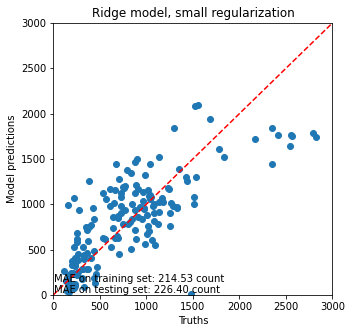

In [28]:
from sklearn.metrics import median_absolute_error
y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} count"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} count"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 3000])
_ = plt.ylim([0, 3000])

Model does not look really good. Maybe check some outliers on the right

## Interpreting coefficients: scale matters

First of all, we can take a look to the values of the coefficients of the
regressor we have fitted.

In [29]:
X.columns

Index(['atemp_norm', 'hum_norm', 'windspeed_norm', 'holiday', 'workingday',
       'season1', 'season2', 'season3', 'season4', 'weathersit1',
       'weathersit2', 'weathersit3'],
      dtype='object')

In [30]:
feature_names = X.columns

coefs = pd.DataFrame(
    model.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
atemp_norm,366.803359
hum_norm,-95.485216
windspeed_norm,-75.474734
holiday,-332.141360
workingday,-859.976314
season1,-157.927740
season2,191.353264
season3,-93.289967
season4,59.108724
weathersit1,135.898176


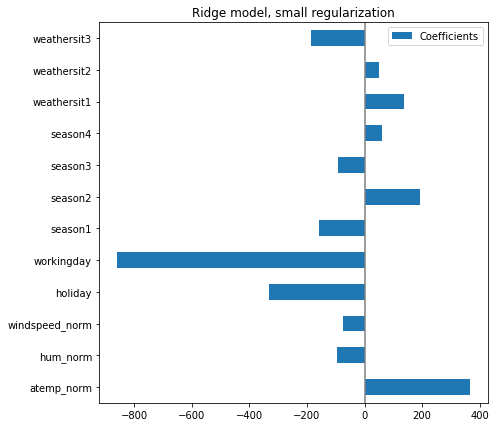

In [31]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

## Checking the variability of the coefficients

We can check the coefficient variability through cross-validation:
it is a form of data perturbation (related to
`resampling <https://en.wikipedia.org/wiki/Resampling_(statistics)>`_).

If coefficients vary significantly when changing the input dataset
their robustness is not guaranteed, and they should probably be interpreted
with caution.

In [32]:
coeff = model.coef_

In [33]:
coeff = np.reshape(coeff, (1,12))

In [34]:
coeff.shape

(1, 12)

In [35]:
coefs = pd.DataFrame(
    coeff,
    columns=feature_names
)

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model,
    X,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)


coefs = pd.DataFrame([est.coef_ for est in cv_model["estimator"]],
   columns=feature_names,)


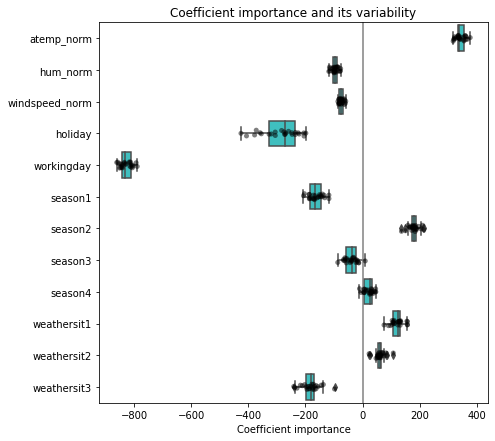

In [37]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.subplots_adjust(left=0.3)

## Linear models with regularization

In machine-learning practice, Ridge Regression is more often used with
non-negligible regularization.

Above, we limited this regularization to a very little amount.
Regularization improves the conditioning of the problem and reduces the
variance of the estimates. RidgeCV applies cross validation in order to
determine which value of the regularization parameter (`alpha`) is best
suited for prediction.

In [38]:
X_test

,atemp_norm,hum_norm,windspeed_norm,holiday,workingday,season1,season2,season3,season4,weathersit1,weathersit2,weathersit3
703,-0.032545,0.743727,-0.211211,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
33,-1.820550,-1.335389,1.126812,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300,-0.955126,-0.295514,0.503491,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
456,-0.350427,0.339741,-0.235254,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
633,0.428770,-0.406755,0.591838,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110,-0.125650,-1.551384,1.740229,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
82,-1.249748,1.250171,0.688242,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
51,-1.168433,-0.160850,1.515398,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,0.417182,-0.116939,-1.463767,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

#del X_train['temp_norm']

model_rigde = RidgeCV(alphas=np.logspace(-10, 10, 21))
        
model_rigde.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))

In [40]:
c_det = r2_score(y_test, y_pred)
c_det

0.608212522889801

First we check which value of $\alpha$ has been selected.


In [41]:
model_rigde.alpha_

1.0

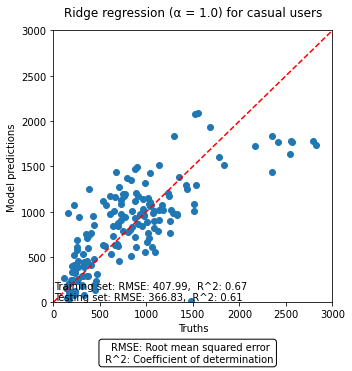

In [42]:
y_pred = model_rigde.predict(X_train)

mae = sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred))
c_det = r2_score(y_train, y_pred)
string_score = f"Training set: RMSE: {mae:.2f}" + ", " + " R^2: "  + "{:.2f}".format(c_det)
y_pred = model_rigde.predict(X_test)
mae = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
c_det = r2_score(y_test, y_pred)
string_score += f"\nTesting set: RMSE: {mae:.2f}" + ", " + " R^2: "  + "{:.2f}".format(c_det) 
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
ax.annotate('RMSE: Root mean squared error \n R^2: Coefficient of determination', xy=(220, -40), xycoords='axes points',
            size=10, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
plt.text(3, 20, string_score)
plt.title("Ridge regression (\u03B1 = 1.0) for casual users", x=0.5, y=1.03)
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 3000])
_ = plt.ylim([0, 3000])
plt.savefig('  Number of casual bike rentals ', dpi = 500, bbox_inches='tight')


In [43]:
coefs = pd.DataFrame(
    model_rigde.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs

,Coefficients
atemp_norm,365.303590
hum_norm,-95.781444
windspeed_norm,-75.591311
holiday,-303.447024
workingday,-850.841185
season1,-158.367184
season2,190.709304
season3,-90.600032
season4,58.257912
weathersit1,131.977094


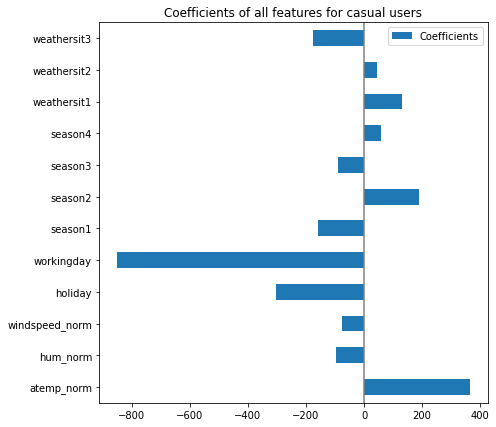

In [44]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Coefficients of all features for casual users")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.savefig(' Coefficients Number of casual bike rentals ', dpi = 500)


## Linear models with sparse coefficients

Another possibility to take into account correlated variables in the dataset,
is to estimate sparse coefficients. 

Lasso models (see the `lasso` User Guide section) estimates sparse
coefficients. LassoCV applies cross validation in order to
determine which value of the regularization parameter (`alpha`) is best
suited for the model estimation.



In [36]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas=np.logspace(-10, 10, 21))

model_lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))

First we verify which value of $\alpha$ has been selected.


In [37]:
model_lasso.alpha_

0.01

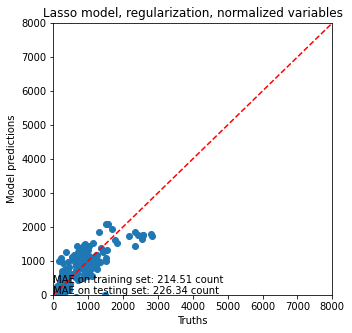

In [38]:
y_pred = model_lasso.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} count"
y_pred = model_lasso.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} count"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Lasso model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 8000])
_ = plt.ylim([0, 8000])

In [39]:
coefs = pd.DataFrame(
    model.coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs

,Coefficients
atemp_norm,366.803359
hum_norm,-95.485216
windspeed_norm,-75.474734
holiday,-332.141360
workingday,-859.976314
season1,-157.927740
season2,191.353264
season3,-93.289967
season4,59.108724
weathersit1,135.898176


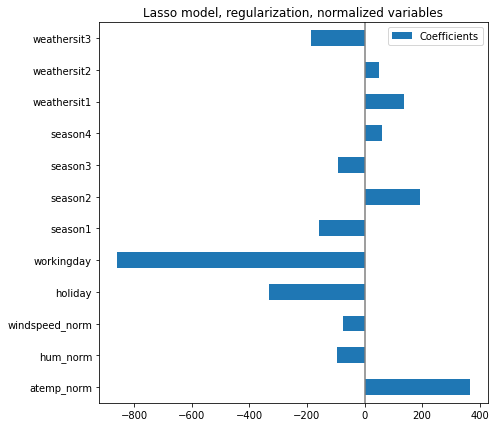

In [40]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The features season2 and weathersit2 were both droppes by the Lasso algorithm

It is important to keep in mind that the coefficients that have been dropped may still be related to the outcome by themselves: the model chose to suppress them because they bring little or no additional information on top of the other features. Additionally, this selection is unstable for correlated features, and should be interpreted with caution.

## Selecting features with Sequential Feature Selection

Another way of selecting features is to use
:class:`~sklearn.feature_selection.SequentialFeatureSelector`
(SFS). SFS is a greedy procedure where, at each iteration, we choose the best
new feature to add to our selected features based a cross-validation score.
That is, we start with 0 features and choose the best single feature with the
highest score. The procedure is repeated until we reach the desired number of
selected features.

We can also go in the reverse direction (backward SFS), *i.e.* start with all
the features and greedily choose features to remove one by one. We illustrate
both approaches here.

In [41]:
from time import time
from sklearn.feature_selection import SequentialFeatureSelector

In [42]:
tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    model_rigde, n_features_to_select=6, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    model_rigde, n_features_to_select=6, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: Index(['atemp_norm', 'hum_norm', 'holiday', 'workingday', 'season1',
       'weathersit3'],
      dtype='object')
Done in 2.628s
Features selected by backward sequential selection: Index(['atemp_norm', 'hum_norm', 'windspeed_norm', 'holiday', 'workingday',
       'season2'],
      dtype='object')
Done in 2.337s


## Selecting features based on importance

Now we want to select the two features which are the most important according
to the coefficients. The :class:`~sklearn.feature_selection.SelectFromModel`
is meant just for that. :class:`~sklearn.feature_selection.SelectFromModel`
accepts a `threshold` parameter and will select the features whose importance
(defined by the coefficients) are above this threshold.

In [43]:
from sklearn.feature_selection import SelectFromModel

importance = np.abs(model_rigde.coef_)

threshold = np.sort(importance)[-7] + 0.01

tic = time()
sfm = SelectFromModel(model_rigde, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")


Features selected by SelectFromModel: Index(['atemp_norm', 'holiday', 'workingday', 'season1', 'season2',
       'weathersit3'],
      dtype='object')
Done in 0.033s


Based on the feature selction methods above I discard the features 'workday' and 'season2' and hope that the model might generalize better to the test data.

In [44]:
X_train.columns

Index(['atemp_norm', 'hum_norm', 'windspeed_norm', 'holiday', 'workingday',
       'season1', 'season2', 'season3', 'season4', 'weathersit1',
       'weathersit2', 'weathersit3'],
      dtype='object')

In [45]:
X_train_new = X_train[['atemp_norm', 'hum_norm', 'windspeed_norm', 'holiday', 'workingday']].copy()
X_test_new = X_test[['atemp_norm', 'hum_norm', 'windspeed_norm', 'holiday', 'workingday']].copy()

In [46]:
model_rigde = RidgeCV(alphas=np.logspace(-10, 10, 21))
        
model_rigde.fit(X_train_new, y_train)

RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))

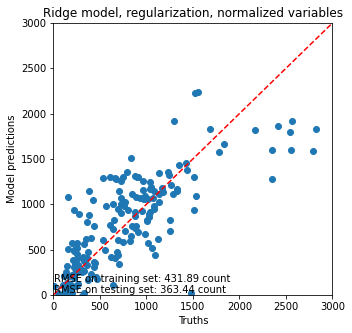

In [47]:
y_pred = model_rigde.predict(X_train_new)
mae = sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred))
string_score = f"RMSE on training set: {mae:.2f} count"
y_pred = model_rigde.predict(X_test_new)
mae = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
string_score += f"\nRMSE on testing set: {mae:.2f} count"
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model, regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 3000])
_ = plt.ylim([0, 3000])

In [48]:
# does not improve the model, predictive ability gets worse

In [49]:
# It seems that discarding any features makes model performance worse, both for training and test data